# Exercício 1

A matriz $X$ e o vetor-coluna $v$ são :

$$
X = \begin{bmatrix} 1.5 & -1 \\ 0 & 0.5 \end{bmatrix}
,
v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$v$ é um auto-vetor de $X$? Justifique sua resposta!

In [ ]:
# Isso não é a resposta do exercício - mas mostra alguns caminhos para encontrar a resposta.
import numpy as np
P = np.array([[1, 0], [1, 1]]).T
Q = np.diag([1.5, 0.5])
X = P @ Q @ np.linalg.inv(P)
print(X)
v, w = np.linalg.eig(X)
print(v)
print(w)

V = np.array([[1, 1]]).T
print(X @ V)

In [10]:
import numpy as np
X = np.array([[1.5, -1], [0, 0.5]])
A = X @ np.array([1,1]).T
A

array([0.5, 0.5])

Quando multiplicou-se vetor v pela matriz A, encontrou-se o resultado [0.5, 0.5], que é proporcinal ao v inicial. Dessa forma, e de acordo com a formula `A * x = x * alpha`, pode-se concluir que v é um autovetor de A pois A * v resulta em um vetor e um valor numérico alpha.

$$
A * x = x * \alpha
$$

$$
\begin{bmatrix} 1.5 & -1 \\ 0 & 0.5 \end{bmatrix}
*
\begin{bmatrix} 1 \\ 1 \end{bmatrix}
=
\begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}
*
2
$$

# Exercício 2

Analise o código abaixo. 

Por que o terceiro painel mostra uma imagem igual à do primeiro painel?

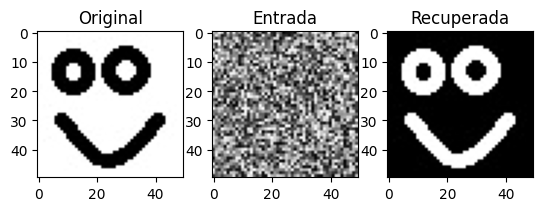

In [25]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Carregando imagem inicial
A = mpimg.imread("smile.jpg").mean(axis=2) # Convertendo para preto e branco

# Construindo matriz de recuperacao
N = A.shape[0] * A.shape[1]     
P = np.random.randn(N, N)       # cria uma matriz (n^2 x n^2) com valores aleatórios
P[:,0] = A.reshape((-1,))       # transforma um array (50 x 50) em um (1 x 2500)

Q = np.ones(N) * 0.9            # cria um vetor de autovalores de tamanho N e valor 0.9
Q[0] = 1                        # altera o valor o primeiro autovalor para 1 

Q = np.diag(Q)                  # tranforma o vetor de autovalores em uma diagonal
X = P @ Q @ np.linalg.inv(P)    # cria a matriz de conversão. "matriz dinamica"

# Criando imagem puramente ruidosa
B = np.random.random(A.shape)

# Aplicando matriz de recuperacao
C = B.reshape((N, 1))           # transforma a matriz b numa matriz coluna e guarda em c
for _ in range(100):            # multiplica C pela matriz de conversão para fazer o pontos tenderem à imagem original
    C = X @ C
C = C.reshape(A.shape)

# Plotando imagem inicial, ruidosa e recuperada
plt.figure()
plt.subplot(1,3,1)
plt.imshow(A, cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(B, cmap='gray')
plt.title('Entrada')
plt.subplot(1,3,3)
plt.imshow(C, cmap='gray')
plt.title('Recuperada')
plt.show()

Foi possível recuperar a imagem e retornar ao resultado original devido a utilização de matriz dinâmica. A matriz dinâmica é construída da seguinte forma: P @ Q @ inv(P), sendo P uma matriz de autovetores, no qual o autovetor zero é a imagem original escrita em um coluna. Já a matriz Q é um vetor de autovalores convertido em uma matriz diagonal, sendo que apenas o autovalor zero tem valor 1 e os demais 0.9.

Dessa forma, quando multiplica-se uma imagem ruidosa diversas vezes pela matriz dinâmica os autovetores com ruído passo-a-passo serão removidos, uma vez que, seus autovalores correspondentes são menores que um e tenderão a zero. Portanto, os pontos da imagem ruidosa convergirão na direção do autovetor restante, que é a imagem original. Resultando assim, numa recuperação perfeita.

# Exercício 3

O código abaixo busca contar palavras únicas em um texto (o texto, neste caso, é o clássico livro "Moby Dick"). Contar palavras únicas significa contar quantas palavras diferentes existem em um texto - por exemplo, "ESTE TEXTO É UM TESTE" tem 5 palavras únicas, ao passo que "ESTE TEXTO É UM TEXTO" tem 4 palavras únicas.

A maneira que a função funciona é manter uma lista com todas as palavras que já foram vistas. Daí, para cada nova palavra, verificamos se ela já existe na nossa lista. Caso não exista, adicionamos a palavra, e, ao fim do processo, retornamos o tamanho dessa lista de palavras já vistas.

O problema do código é que verificar se uma palavra está em uma lista envolve varrer a lista inteira, o que, para um texto de $N$ palavras, pode levar $N$ iterações. Como fazemos isso $N$ vezes (uma para cada palavra do texto), então temos um algoritmo que executa em tempo quadrático, isto é, $O(N^2)$.

Como o tempo de execução do algoritmo cresce muito rapidamente com o aumento do número de palavras do texto, demora muito para contar palavras únicas no texto inteiro de Moby Dick. Porém, podemos medir o tempo de execução para apenas as primeiras palavras do texto.

Como sabemos que o tempo $t$ de execução do algoritmo para $N$ palavras é um polinômio de segundo grau, então:

$
t = A N^2 + BN + C,
$

use os dados da execução do teste abaixo no seu computador para fazer uma regressão usando autograd, encontre $A$, $B$ e $C$, e estime quanto tempo levaria para este algoritmo contar as palavras de todo o texto de Moby Dick.

In [ ]:
import urllib.request
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

url = 'https://www.gutenberg.org/files/2701/2701-0.txt'
data = urllib.request.urlopen(url).read().decode('utf-8')
words = data.split()

def contar_palavras_unicas(lista_de_palavras):
    ja_contei = []
    for palavra in lista_de_palavras:
        if palavra not in ja_contei:
            ja_contei.append(palavra)
    return len(ja_contei)

lista_N = []
lista_t = []
for N in tqdm(range(100, int(len(words)/8), 1000)):
    t0 = time.time()
    contar_palavras_unicas(words[0:N])
    t1 = time.time()
    t = t1-t0
    lista_N.append(N)
    lista_t.append(t)

2.49454494825431e-10 9.999999852929226e-06 -2.0717523951040973e-17


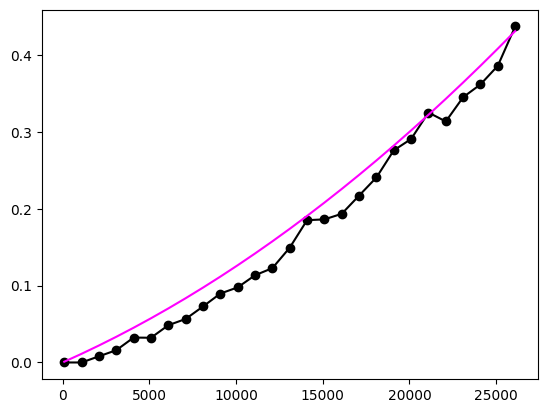

In [19]:
import autograd.numpy as np_ 
from autograd import grad
import numpy as np

x,y = np.array([lista_N], dtype=float), np.array([lista_t], dtype=float)

def loss(parametros):
    a, b, c, x, y = parametros
    est = a*(x*x) + b*x + c
    mse = np_.mean((est - y)**2)
    return mse

g = grad(loss)
a, b, c = 10**-9, 10**-5, 0.0
alpha = 10**-17

for n in range(100):
    grad_ = g((a, b, c, x, y))
    a -= alpha*grad_[0]
    b -= alpha*grad_[1]
    c -= alpha*grad_[2]

y_est = a*(x*x) + b*x + c
plt.figure()
plt.plot(lista_N, lista_t, c="k")
plt.scatter(lista_N, lista_t, c="k")
plt.plot(lista_N, y_est[0], c="magenta")

plt.show()

In [23]:
N = len(words)
tempo = a*(N*N) + b*N + c 
print(f'O tempo gasto pelo computador seria: {tempo:.2f} unidades de tempo.')

O tempo gasto pelo computador seria: 13.78 unidades de tempo.


# Exercício 4

Um algoritmo promete comprimir a palavra `ABACATEIRO` em apenas 10 bits. Esse algoritmo é:

1. Mais, igualmente ou menos eficaz que o código de Huffman?
1. Possível ou impossível de acordo com o limite teórico dado pela entropia?

In [11]:
import scipy.stats as stats

1.Após montar a árvore para efetuar o código de Huffman encontrou-se os seguintes códigos para cada letra:
   * A - 01
   * B - 000
   * C - 0011
   * T - 0010
   * E - 101
   * I - 100
   * R - 111
   * O - 110

Assim, a palavra pode ser reescrita da seguinte forma: 
01 - 000 - 01 - 0011 - 01 - 0010 - 101 - 100 - 111 - 110. Gerando uma compressão de 29 bits. Portanto, pode-se afirmar que o algoritmo é mais eficaz.

In [23]:
#2. ENTROPIA -> LIMITE INFERIOR DE BITS PARA MENSAGEM MAIS COMPRIMIDA POSSÍVEL
ent = [1/10]*7
ent.append(3/10)
a = stats.entropy((ent), base=2)
a

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.3]


2.8464393446710154

O valor da entropia indica o limite inferior de bits para a mensagem mais comprimida possível. O resultado encontrado foi 2.84 por caracter, logo o mínimo seria 28.4 bits para compressão da palavra. Isso significa que é impossível para algoritmo fazer a compressão prometida.